##### Imports

In [ ]:
import asvFormula.experiments as exp
from asvFormula.bayesianNetworks.bayesianNetwork import childBNAsTree
from asvFormula.bayesianNetworks import networkSamplesPath
from asvFormula import asvRunResultsPath
from asvFormula.datasetManipulation import *
from pgmpy.readwrite import BIFReader
from pgmpy.inference import VariableElimination

from importlib import reload 
import asvFormula
import asvFormula.experiments as exp

exp = reload(asvFormula.experiments)

decisionTreesFolder = 'results/decisionTrees/'
seed = 32

### Running ASV for Cancer bayesian network

#### Train the decision tree model

In [10]:
BNmodel, variableToPredict, numberOfSamples, treeMaxDepth = exp.cancerNetworkConfig()

BNInference, valuesPerFeature, encodedDataset, dtTreeClassifier, dtAsNetwork = initializeDataAndRemoveVariable(BNmodel, variableToPredict, numberOfSamples, treeMaxDepth, seed)

  0%|          | 0/5 [00:00<?, ?it/s]

The model accuracy is : 0.7416666666666667


#### Mean prediction of model

In [12]:
dataNoPrediction = encodedDataset.drop(variableToPredict, axis=1)
first_instance = dataNoPrediction.iloc[0]

asvCalc = exp.ASV(BNmodel, dtTreeClassifier, BNInference, valuesPerFeature, variableToPredict, 'Exact', first_instance)

# Use the complete bayesian network to calculate the mean prediction
cancerNetworkPath = networkSamplesPath + '/cancer.bif'
completeBNModel = BIFReader(cancerNetworkPath).get_model()
num_variables = len(completeBNModel.nodes())

completeBNInference = VariableElimination(completeBNModel)

exp.showMeanPredictionOfModel(variableToPredict, completeBNInference, valuesPerFeature, dtTreeClassifier, asvCalc, num_variables)

Mean prediction of model for the variable Smoker
Mean prediction value for the decision tree: [0.9536 0.0464], it took 0.003242949499963288 seconds
Mean prediction value for the probabilities of the decision tree: [0.67713323 0.32286677], it took 0.003242949499963288 seconds
Mean prediction value for possible values of the dataset: [0.9536000000000002, 0.04640000000000001], it took 0.0209465969996927 seconds
Estimated value for shap explainer: [0.68541667 0.31458333]
Probabilities of the variable in the bayesian network: [0.7, 0.3]


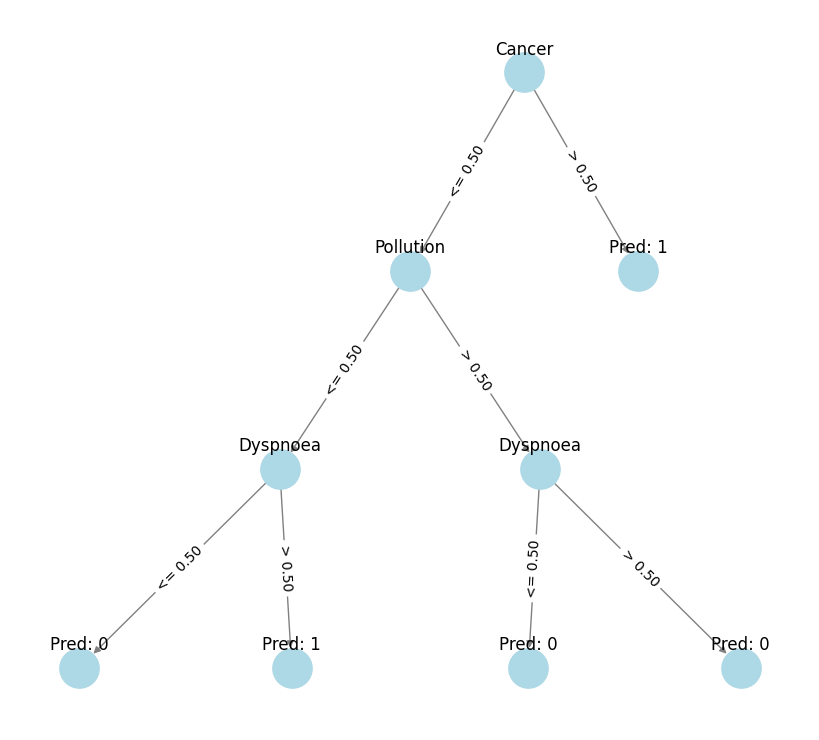

In [14]:
drawDecisionTree(dtAsNetwork, decisionTreesFolder + 'cancerDecisionTree.png')

### Running ASV for Child bayesian network

#### Train the decision tree model

In [15]:
BNmodel, variableToPredict, numberOfSamples, treeMaxDepth = exp.childNetworkConfig()

BNInference, valuesPerFeature, encodedDataset, dtTreeClassifier, dtAsNetwork = initializeDataAndRemoveVariable(BNmodel, variableToPredict, numberOfSamples, treeMaxDepth)


  0%|          | 0/20 [00:00<?, ?it/s]

The model accuracy is : 0.6565


#### Mean prediction of model

In [16]:
dataNoPrediction = encodedDataset.drop(variableToPredict, axis=1)
first_instance = dataNoPrediction.iloc[0]

asvCalc = exp.ASV(BNmodel, dtTreeClassifier, BNInference, valuesPerFeature, variableToPredict, 'Exact', first_instance)

# Use the complete bayesian network to calculate the mean prediction
childNetworkPath = networkSamplesPath + '/child.bif'
completeBNModel = BIFReader(childNetworkPath).get_model()
completeBNInference = VariableElimination(completeBNModel)
num_variables = len(completeBNModel.nodes())

exp.showMeanPredictionOfModel(variableToPredict, completeBNInference, valuesPerFeature, dtTreeClassifier, asvCalc, 11)
#drawDecisionTree(dtAsNetwork, decisionTreesFolder + 'childDecisionTree.png')

#The prediction for the first instance is 0, so if a lot of the features are fixed, then there is a higher chance that the prediction is 0.



Mean prediction of model for the variable Age
Mean prediction value for the decision tree: [1. 0. 0.], it took 0.006949948499823222 seconds
Mean prediction value for the probabilities of the decision tree: [0.74543753 0.05404542 0.20051705], it took 0.006949948499823222 seconds
Mean prediction value for possible values of the dataset: [1.0, 0.0, 0.0], it took 21.95029531399996 seconds
Estimated value for shap explainer: [0.689125 0.1375   0.173375]
Probabilities of the variable in the bayesian network: [0.6489918355500001, 0.17148510286900004, 0.17952306158100004]
